<a href="https://colab.research.google.com/github/atejap05/pos_data_science_furg/blob/main/disciplinas/Machine_Learning_II/semana03/Furg_ECD_Machine_Learning_II_Semana_03_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Clusterização
### Prof. Marcelo Malheiros

Parte do código adaptada de Aurélien Geron (licença Apache-2.0)

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames
- Scikit-Learn: biblioteca com algoritmos de Machine Learning

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Comparativo de classificação versus clusterização

Aqui vamos usar o tradicional _dataset_ IRIS para fazer a comparação.

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
print(data.target_names)

['setosa' 'versicolor' 'virginica']


Visualmente, a diferença entre as duas tarefas pode ser ilustrada pelos dois gráficos abaixo, distinguindo as classes (à esquerda) e sem distinguir (à direita).

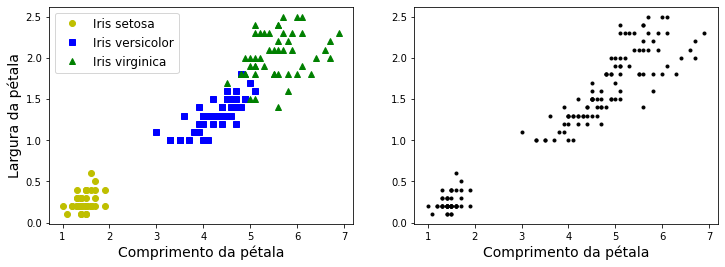

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris virginica')
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.show()

Usar um algoritmo de agrupamento da biblioteca Scikit-Learn segue o mesmo conjunto de passos de outros algoritmos: importar o algoritmo, criar um objeto (especificando os hiperparâmetros mais importantes) e fazer o processamento.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42, n_clusters=3)

y_pred = kmeans.fit_predict(X)

O algoritmo `KMeans` encontrou os três _clusters_ solicitados, que vamos colorizar manualmente com as mesmas cores dos rótulos originais, para efeito de comparação.

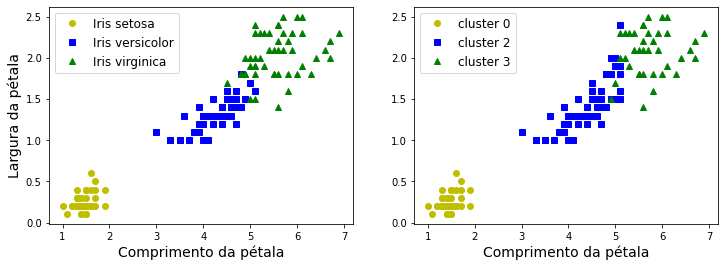

In [7]:
mapping = [1, 0, 2]
y_map = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris virginica')
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.plot(X[y_map==0, 2], X[y_map==0, 3], 'yo', label='cluster 0')
plt.plot(X[y_map==1, 2], X[y_map==1, 3], 'bs', label='cluster 2')
plt.plot(X[y_map==2, 2], X[y_map==2, 3], 'g^', label='cluster 3')
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [8]:
# percentual de acertos
print('{:.2%}'.format(np.sum(y_map==y) / len(y)))

89.33%


# Algoritmo K-Means

Inicialmente vamos construir um _dataset_ sintético com "nuvens" de pontos, usando a função `make_blobs`.

In [9]:
from sklearn.datasets import make_blobs

# centro de cada nuvem
blob_centers = np.array([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])

# dispersão de cada nuvem
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# criação dos dados
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=42)

In [10]:
# função auxiliar
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

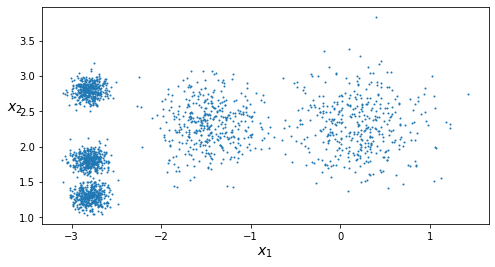

In [11]:
# gráfico de dispersão
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## Ajuste e predição

Vamos aplicar o algoritmo K-Means para este conjunto de dados. Ele tentará encontrar o centro de cada nuvem e atribuir cada instância ao centróide mais próximo.

In [12]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(random_state=42, n_clusters=k)
y_pred = kmeans.fit_predict(X)

Cada instância foi associada a um dos cinco _clusters_, de números 0 até 4.

In [13]:
print(y_pred)

[3 0 2 ... 0 3 1]


Depois de feito o ajuste, os _labels_ também podem ser acessados via campo `.labels_`. Os centróides (ou seja, os centros dos _clusters_) calculados estão acessíveis via `.cluster_centers_`.

In [14]:
print('rótulos:', kmeans.labels_)
print('centróides:\n', kmeans.cluster_centers_)

rótulos: [3 0 2 ... 0 3 1]
centróides:
 [[ 0.20925539  2.30351618]
 [-2.80372723  1.80873739]
 [-1.4453407   2.32051326]
 [-2.79846237  2.80004584]
 [-2.79244799  1.2973862 ]]


Agora podemos predizer os rótulos de novas instâncias:

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2]])
print('rótulos preditos:', kmeans.predict(X_new))

rótulos preditos: [0 0 3 1]


## Fronteiras de decisão

Ao fazer o agrupamento em regiões, o algoritmo K-Means estabelece **fronteiras de decisão**. Vamos visualizar elas a seguir, usando uma subdivisão espacial chamada **diagrama de Voronoi**.

In [16]:
# funções auxiliares de desenho

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

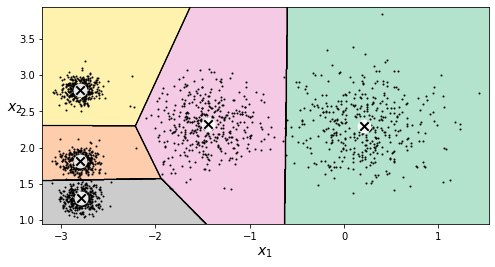

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Note que algumas das instâncias próximas às bordas provavelmente foram atribuídas ao _cluster_ errado. Mesmo assim, o algoritmo foi bem-sucedido.

## Hard clustering versus soft clustering

Em vez de escolher somente o _cluster_ mais próximo para cada instância, o que é chamado de _hard clustering_, podemode medir a distância de cada instância a cada um dos 5 centróides. Isso é o que o método `transform()` faz.

In [18]:
kmeans.transform(X_new)

array([[0.36865958, 2.81024337, 1.48045212, 2.91057812, 2.87948466],
       [2.80720102, 5.80687792, 4.45688037, 5.85339553, 5.8349053 ],
       [3.28396253, 1.20732332, 1.69666372, 0.28389977, 1.71521765],
       [3.223576  , 0.27405179, 1.5873545 , 0.82503986, 0.73262814]])

Estas diversas distãncias podem então ser combinadas em uma medida ponderada, um _score_, que pode então indicar melhor a pertinência ou não de cada instãncia a um _cluster_. Esse é o princípio do _soft clustering_.

Note que esta também pode ser encarada como uma técnica de **redução de dimensionalidade**, caso o número de atributos seja maior que o número de _clusters_.

## Funcionamento do algoritmo original K-Means

O algoritmo K-Means é um dos algoritmos de clusterização mais rápidos e também um dos mais simples. A versão original dele, que tem algumas limitações, funciona assim:

- Inicialize $k$ centróides com posições aleatórias, copiadas de $k$ instâncias distintas escolhidas randomicamente.

- Repita até a convergência (ou seja, até que os centróides parem de se mover):

     - Atribua cada instância ao centróide mais próximo.
     
     - Calcule a média das posições de todas as instâncias de mesma classe.
     
     - Atualize cada centróide com sua respectiva média de posições.
     
A seguir, uma breve ilustração do processo é feita usando a própria classe `KMeans`.

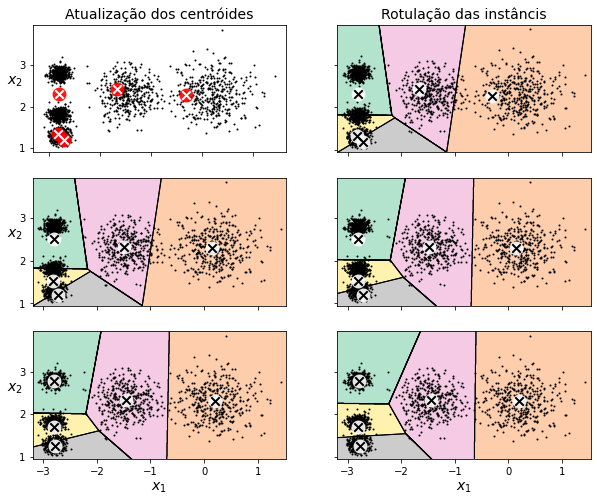

In [19]:
# três iterações do algoritmo
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=1, random_state=7)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=2, random_state=7)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=3, random_state=7)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# plotagem
plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title('Atualização dos centróides', fontsize=14)
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Rotulação das instâncis', fontsize=14)
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.show()

Na versão original do algoritmo K-Means, um grande problema é que se você executar ele várias vezes (ou com diferentes sementes aleatórias), a tendência é convergir para soluções muito diferentes.

In [20]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(10, 3.2))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

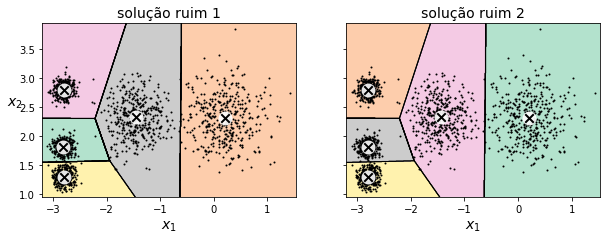

In [21]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', random_state=0)
kmeans_rnd_init2 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', random_state=3)
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, 'solução ruim 1', 'solução ruim 2')
plt.show()

## Uso da métrica de inércia

Se necessário, poderíamos rodar o K-Means diversas vezes e utilizar a métrica de **inércia** para comparar os resultados, pegando o melhor modelo

A inércia é a soma das distâncias quadradas entre cada instância de treinamento e seu centróide mais próximo, e pode ser obtida diretamente após o treinamento via campo `.inertia_`.

In [22]:
kmeans.inertia_

213.42177131258921

O método `score()` retorna a inércia negativa, pois o método `score()` de um preditor deve sempre respeitar a regra de que _"maior é melhor"_.

In [23]:
kmeans.score(X)

-213.42177131258924

Quando definimos o hiperparâmetro `n_init`, o Scikit-Learn executa o algoritmo original `n_init` vezes, selecionando a solução que minimiza a inércia. Por padrão, o Scikit-Learn define `n_init = 10`.

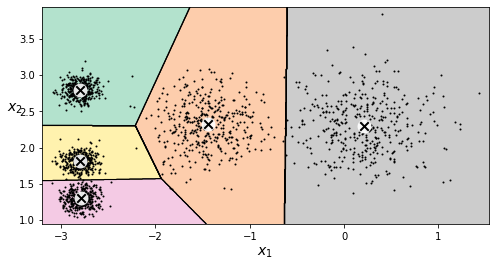

In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10, algorithm='full', random_state=2)
kmeans_rnd_10_inits.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## Otimizações do K-Means

Na prática, a **configuração padrão** do `K-Means` já incorpora diversas otimizações em relação ao algoritmo original, de forma que usualmente não é necessário alterar os hiperparâmetros `init`, `n_init` ou `algorithm`.

Resumidamente essa otimizações já escolhem o melhor modelo entre diversos (usando a inércia como métrica), incorporam uma estratégia de melhor escolha de centróides iniciais (K-Means++) e reduz o tempo de cálculo das distâncias (Accelerated K-Means).

In [25]:
X_large, y_large = make_blobs(n_samples=1000000, centers=blob_centers, cluster_std=blob_std, random_state=42)

In [26]:
from sklearn.cluster import KMeans

k = 5
df_kmeans = KMeans(random_state=421, n_clusters=k)
%time df_kmeans.fit(X_large)

Wall time: 7.34 s


KMeans(n_clusters=5, random_state=421)

Em vez de usar o conjunto de dados completo em cada iteração, o algoritmo
'MiniBatchKMeans` é capaz de usar lotes de instâncias, movendo os centróides apenas ligeiramente a cada iteração. Isso acelera o algoritmo normalmente por um fator de três ou quatro e torna possível clusterizar grandes conjuntos de dados, mesmo que não caibam na memória.

Aqui vamos fazer o agrupamento com o mesmo conjunto de dados anterior, para ver que há um ganho de tempo na execução.

In [27]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
%time mb_kmeans.fit(X_large)

Wall time: 786 ms


MiniBatchKMeans(n_clusters=5, random_state=42)

## Encontrando o número ótimo de clusters

O hiperparâmetro mais importante (e normalmente o único) a ser definido é $k$, a quantidade de _clusters_ desejada.

Essa escolha é extremamente importante, pois deve corresponder aproximadamente à organização (ainda não completamente conhecida) dos dados. Um diagrama de dispersão pode ajudar a visualizar a relação entre duas ou três _features_, mas ainda assim é limitada para sugerir o número ideal de _clusters_.

Um número pequeno ou elevado tem efeitos ruins sobre o processo de agrupamento, como mostram as figuras a seguir.

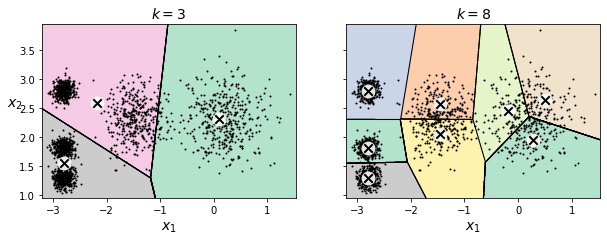

In [28]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, '$k=3$', '$k=8$')
plt.show()

In [29]:
kmeans_k3.inertia_

662.9432340781598

In [30]:
kmeans_k8.inertia_

122.21669990809285

Neste caso não é possível tomar o valor de $k$ que minimiza a inércia, já que este fica cada vez menor à medida que aumentamos $k$.

De fato, quanto mais _clusters_ houver, mais perto cada instância estará de seu respectivo centróide e, portanto, menor será a inércia.

Devemos então plotar a inércia em função de $k$ e analisar o "cotovelo" ou _elbow_ da curva resultante. Esse ponto indicará um valor aproximado (para mais ou para menos) em que devemos considerar a escolha do número de _clusters_.

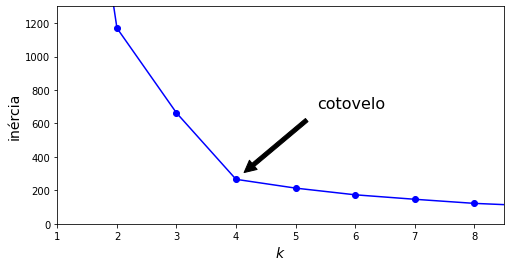

In [31]:
# gera diversos modelos à medida em que k varia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# gráfico
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('inércia', fontsize=14)
plt.annotate('cotovelo', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction',
             fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.savefig('inertia-k', dpi=100)
plt.show()

Outra abordagem é olhar para a **pontuação da silhueta** (ou _silhouette score_). Este valor é calculado como o coeficiente da silhueta médio de todas as instâncias.

O **coeficiente de silhueta** de uma instância é igual a $(b - a) /\ max(a, b)$, onde $a$ é a distância média para as outras instâncias no mesmo _cluster_ e $b$ é a distância média do _cluster_ mais próximo.

Cada coeficiente de silhueta pode variar entre -1 e +1: um coeficiente próximo a +1 significa que a instância está bem dentro de seu próprio _cluster_ e longe de outros _clusters_, enquanto um coeficiente próximo a 0 significa que está perto do limite de um _cluster_. Finalmente, um coeficiente próximo a -1 significa que a instância pode ter sido atribuída ao _cluster_ errado.

In [32]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.656578194104489

Podemos então plotar a variação do _silhouette score_ à medida em que $k$ varia.

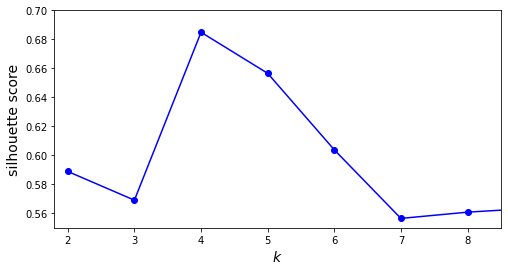

In [33]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('silhouette score', fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

De fato, esta visualização é muito mais rica do que a anterior. Embora o gráfico confirme que $k = 4$ é uma escolha muito boa, também destaca o fato de que $k = 5$ também é outra ótima opção.

Uma visualização ainda mais informativa é fornecida quando plotamos o coeficiente de silhueta de cada instância, classificado pelo _cluster_ ao qual eles são atribuídos e pelo valor deste coeficiente. Isso é chamado de **diagrama de silhueta**.

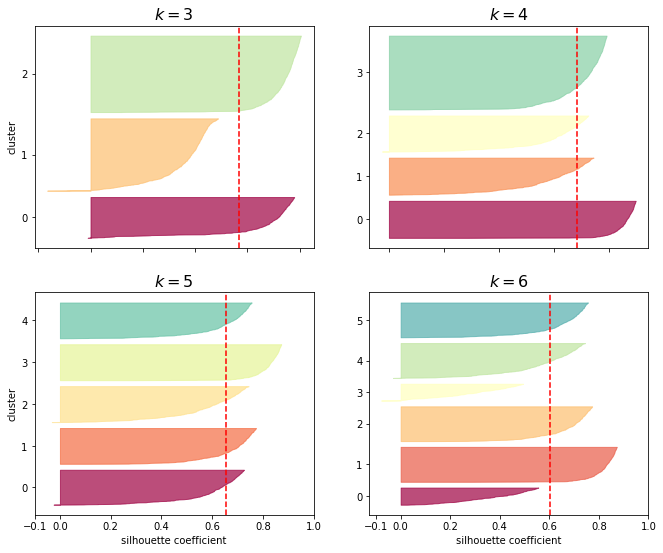

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel('cluster')
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('silhouette coefficient')
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

Cada diagrama contém uma forma de "faca" por _cluster_. A altura da forma indica o número de instâncias que o _cluster_ contém, e sua largura representa os coeficientes de silhueta ordenados (das instâncias deste _cluster_). Então quanto mais comprida a "faca", melhor. A linha tracejada indica o coeficiente de silhueta médio.

Podemos ver que $k = 5$ parece a melhor opção, já que todos os _clusters_ são aproximadamente do mesmo tamanho e todos eles cruzam a linha tracejada.

## Limitações do K-Means

O K-Means não se comporta muito bem quando os _clusters_ têm tamanhos variados, densidades diferentes ou formas achatadas. Nesse caso outros algoritmos devem ser experimentados.

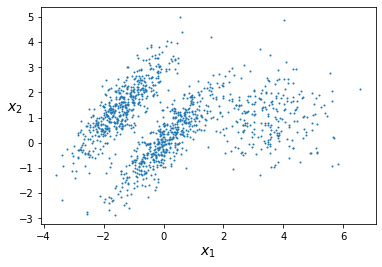

In [35]:
# dataset problemático

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

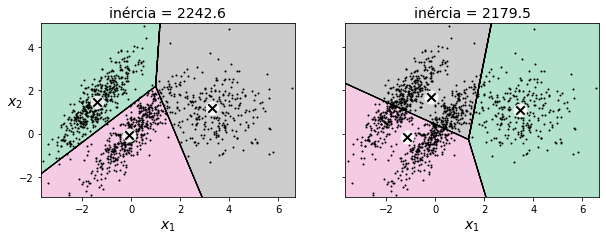

In [36]:
# modelo bem sucedido (esquerda)
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_good.fit(X)

# modelo mal sucedido (direita)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_bad.fit(X)

# figuras
plt.figure(figsize=(10, 3.2))
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('inércia = {:.1f}'.format(kmeans_good.inertia_), fontsize=14)
plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title('inércia = {:.1f}'.format(kmeans_bad.inertia_), fontsize=14)
plt.show()

# Algoritmo DBSCAN

Da mesma forma que para o K-Means, a biblioteca Scikit-Learn disponibiliza um algoritmo `DBSCAN` pronto para o uso, e seguindo a mesma interface de programação.

Aqui vamos usar como teste o _dataset_ sintético `moons`.

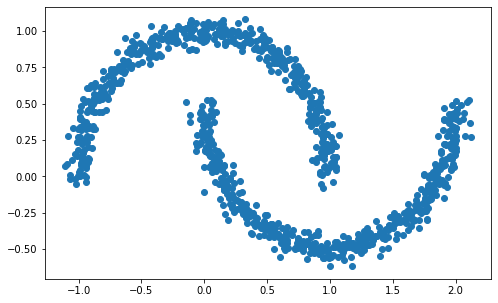

In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(X[:,0], X[:,1])
plt.show()

Para o `DBSCAN`, precisamos obrigatoriamente informar dois hiperparâmetros: `eps`, que indica uma distância pequena para definir a **proximidade** entre instâncias, e `min_samples`, que é o número mínimo de instâncias próximas para termos uma **região densa**.

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

O algoritmo DBSCAN define _clusters_ como regiões contínuas de alta densidade. Funciona assim:

- Para cada instância, o algoritmo conta quantas instâncias estão localizadas a uma pequena distância `eps` dela. Esta região é chamada de vizinhança da instância.

- Se uma instância tem pelo menos `min_samples` instâncias em sua vizinhança (incluindo ela mesma), então ela é considerada uma **instância central**. Ou seja, as instâncias centrais são aquelas localizadas em regiões densas.

- Todas as instâncias na vizinhança de uma instância central pertencem ao mesmo _cluster_. Essa vizinhança pode incluir outras instâncias centrais. Dessa maneira uma longa sequência de instâncias centrais vizinhas forma um único _cluster_.

- Qualquer instância que não seja uma instância central e que também não tenha uma instância central em sua vizinhança é considerada uma **anomalia**.

In [39]:
print('dez primeiros rótulos:', dbscan.labels_[:10])

dez primeiros rótulos: [ 0  2 -1 -1  1  0  0  0  2  5]


Observe que algumas instâncias têm um índice de cluster igual a `-1`, o que significa que eles são considerados como anomalias pelo algoritmo.

Os índices das instâncias centrais são disponível na variável `.core_sample_indices_`, e os próprios atributos estão disponíveis na variável `.components_`.

In [40]:
print('número de instâncias centrais:', len(dbscan.core_sample_indices_))
print('cinco primeiros índices das instâncias centrais:', dbscan.core_sample_indices_[:5])
print('cinco primeiras instâncias centrais:\n', dbscan.components_[:5])

número de instâncias centrais: 808
cinco primeiros índices das instâncias centrais: [0 4 5 6 7]
cinco primeiras instâncias centrais:
 [[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]]


In [41]:
print('rótulos definidos:', np.unique(dbscan.labels_))

rótulos definidos: [-1  0  1  2  3  4  5  6]


In [42]:
# função auxiliar
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='o', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker='.')
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title('eps={:.2f}, min_samples={}'.format(dbscan.eps, dbscan.min_samples), fontsize=14)

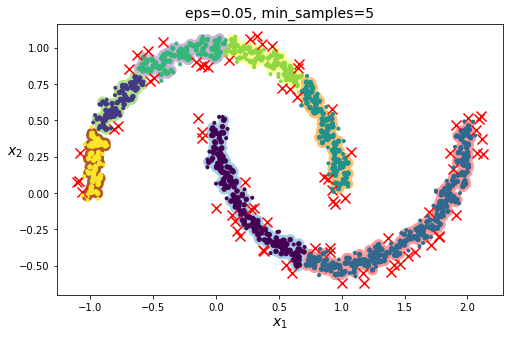

In [43]:
plt.figure(figsize=(8, 5))
plot_dbscan(dbscan, X, size=100)
plt.show()

O DBSCAN resultou no agrupamento mostrado no gráfico anterior.

O algoritmo identificou muitas anomalias, indicadas em vermelho, além de sete _clusters_ diferentes. Isso aconteceu por conta do pequeno valor de `eps` definido.

Se alargarmos a vizinhança de cada instância aumentando `eps` para `0.2`, obtemos o agrupamento abaixo, que se ajusta muito bem aos dados.

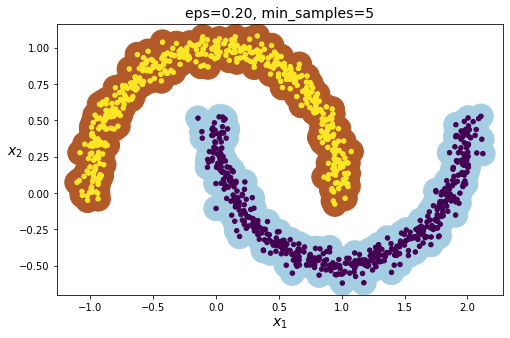

In [44]:
# novo modelo
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plt.figure(figsize=(8, 5))
plot_dbscan(dbscan, X, size=600)
plt.show()

## Predição com o DBSCAN

Note que a classe DBSCAN não tem um método `predict()` para predizer novas instâncias. O algoritmo faz apenas o agrupamento do conjunto de dados fornecido.

Contudo, é bem direto usar agora um classificador tradicional, como por exemplo o algoritmo `KNeighborsClassifier`, para aprender a estrutura dos dados e ser capaz de classificar novas instâncias.

É isso o que o código abaixo faz, usando como treino da classificação apenas as instâncias centrais. Outras estratégias são possíveis, usando ou não todas as instâncias, ou mesmo usando também as anomalias.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# criação do classificador e treinamento com as instâncias centrais apenas
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# predição de quatro novas instâncias
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))

[1 0 1 0]


In [46]:
# probabilidades das novas instâncias pertencerem a cada um dos dois clusters
print(knn.predict_proba(X_new))

[[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


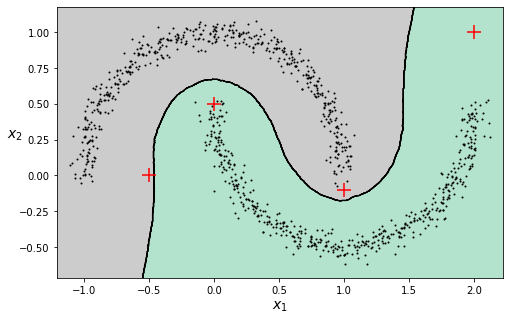

In [47]:
# visualização da fronteira de decisão do classificador
plt.figure(figsize=(8, 5))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c='r', marker='+', s=200, zorder=10)
plt.show()

In [48]:
# anomalias podem ser detectadas impondo uma distância máxima dos vizinhos
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# aqui a distânia máxima é 0.2: anomalias são marcadas com -1
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Limitações do DBSCAN

O DBSCAN não se comporta muito bem quando os _clusters_ não estão suficientemente separados por regiões de baixa densidade. Nesse caso outros algoritmos devem ser experimentados.

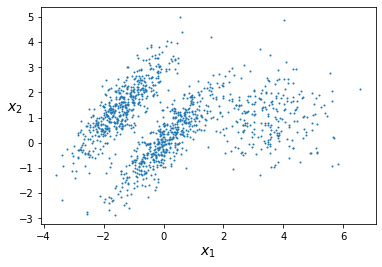

In [49]:
# dataset problemático

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

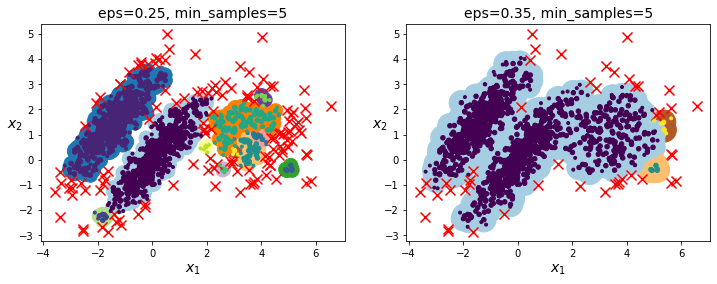

In [50]:
# modelo 1 (esquerda)
dbscan1 = DBSCAN(eps=0.25, min_samples=5)
dbscan1.fit(X)

# modelo 2 (direita)
dbscan2 = DBSCAN(eps=0.35, min_samples=5)
dbscan2.fit(X)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_dbscan(dbscan1, X, size=200)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600)
plt.show()